# Which Neighborbood is best for a stray cat?

Name: Matthew Bell

In [2]:
import pandas as pd
import geopandas
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

# Import tree data
trees = pd.read_csv('Trees.csv', low_memory = False)

# Import neighborhood shape file
neighborhoods = geopandas.read_file("Neighborhoods/Neighborhoods_.shp")

# Before we beign...

We will be using the data set called **City of Pittsburgh Trees**

"Trees cared for and managed by the City of Pittsburgh Department of Public Works Forestry Division"

Here is the idea: 

#### Cats LOVE climbing things!

![Cat Climbing](https://media2.giphy.com/media/v1.Y2lkPTc5MGI3NjExbmd5YnduMWVjM2ZuMjA2dXVnaGxlMDNuamFrcjhqZnM1N3hnM2p1YSZlcD12MV9pbnRlcm5hbF9naWZfYnlfaWQmY3Q9Zw/aXAodOc4n6QRQcm24M/giphy.gif)

So the first logical step would be:

more trees = more fun for cats

*Right?*

Well, let's see how many trees we're dealing with here.

In [3]:
# Get total number of trees
total_trees = len(trees)

# Address trees without neighborhood data
without_neighborhood = trees['neighborhood'].isna().sum()

# Find number of valid trees
valid_trees = total_trees - without_neighborhood
print(valid_trees)

45450


# That is a lot of trees...

However, some of them are *missing data* in the neighborhood column.

Which is obviously something we need...

Let's make this easier and create a **new data frame** with just trees that have neighborhood data.

And from that, create another with total trees by neighborhood!

In [4]:
# Create a new data frame containing trees with neighborhhod data
trees_with_neighborhood = trees[trees['neighborhood'].notna()].copy()

# Group by neighborhood and count the trees
tree_counts = trees_with_neighborhood.groupby('neighborhood').size().reset_index(name='tree_count')

# *Visualize*

Time to merge this data into a fancy map!

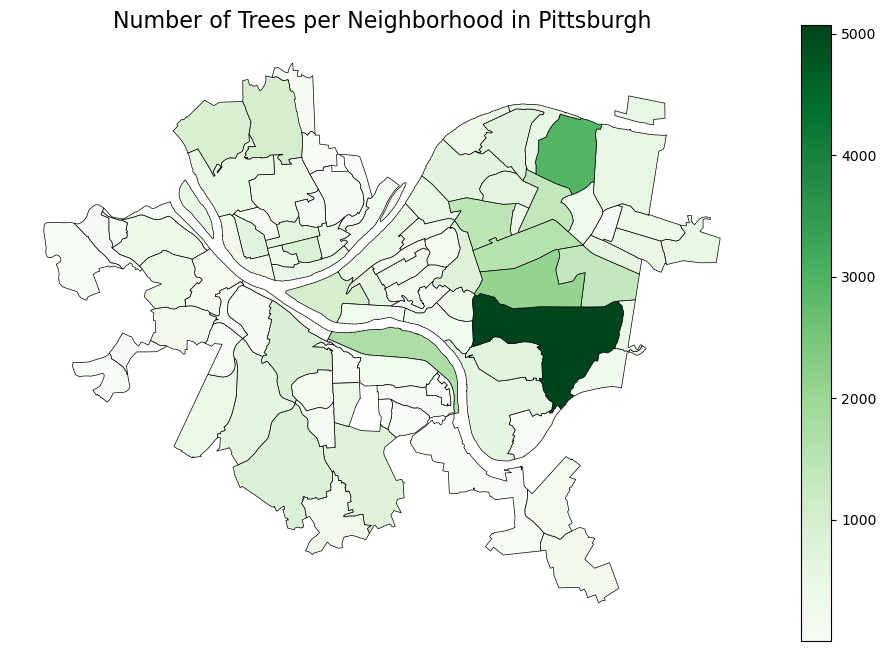

In [5]:
# Merge counts into shapefile
neighborhoods_map = neighborhoods.merge(tree_counts, left_on='hood', right_on='neighborhood', how='left')
neighborhoods_map['tree_count'] = neighborhoods_map['tree_count'].fillna(0)

# Plot
fig, ax = plt.subplots(figsize=(12, 8))
neighborhoods_map.plot(
    column='tree_count',
    cmap='Greens',
    linewidth=0.5,
    edgecolor='black',
    legend=True,
    ax=ax
)

ax.set_title("Number of Trees per Neighborhood in Pittsburgh", fontsize=16)
ax.axis('off')
plt.show()

### The map looks nice...

*but*

Exactly how many trees are in each neighborhood?

We can easily show the top 5 using a table.

In [6]:
# Create a table showing the top 5 neighborhoods
top5_neighborhoods = tree_counts.sort_values(by='tree_count', ascending=False).head(5)
top5_neighborhoods

,neighborhood,tree_count
76,Squirrel Hill South,5073
39,Highland Park,2941
75,Squirrel Hill North,2083
71,South Side Flats,1693
67,Shadyside,1558


# There we have it!

*Wow!* That was **easy!**

According to our extremely rigorous analysis, the **winner** is:

### 🐈 Squirrel Hill South! 🐈

Most trees = best neighborhood

*Right?*



![Pump the brakes](https://media2.giphy.com/media/v1.Y2lkPTc5MGI3NjExdnN5amY0bWFjc3owOTB6ajhoOGd2d3Z0ZzBqb3N2eWZ4a29oa3VreiZlcD12MV9pbnRlcm5hbF9naWZfYnlfaWQmY3Q9Zw/3Om0aYfA5tJvQAxtTb/giphy.gif)


Not all trees are equal in the mind of a cat!

We have established that cats love climbing...

Therefore:

### *The neighborhood with the most **climbable area** should be #1!*

![Spongebob number one](https://media2.giphy.com/media/v1.Y2lkPTc5MGI3NjExcjBvbmo2YWxuaTkzcHZnazhibnljcTV6NGlzbTZibmtqM2U1c3F2bCZlcD12MV9pbnRlcm5hbF9naWZfYnlfaWQmY3Q9Zw/l3nFdFNwIXJ1RnoGY/giphy.gif)

To tackle this task, first use only the columns which we need for our purposes...

In [7]:
# Create a new data frame with only the information we need

# Define useful columns
useful_columns = [
    'common_name', 'height', 'diameter_base_height', 'neighborhood', 'latitude', 'longitude'
]

climbable_trees = trees[trees['neighborhood'].notna()][useful_columns].copy()
climbable_trees.head()

,common_name,height,diameter_base_height,neighborhood,latitude,longitude
0,Stump,0.0,16.0,Homewood North,40.458169,-79.889724
1,Linden: Littleleaf,0.0,22.0,Oakwood,40.429269,-80.067868
2,Maple: Red,22.0,6.0,South Side Flats,40.426797,-79.965035
3,Maple: Freeman,25.0,7.0,East Allegheny,40.455503,-79.999276
4,Maple: Norway,52.0,38.0,Highland Park,40.476667,-79.924106


![What](https://media3.giphy.com/media/v1.Y2lkPTc5MGI3NjExeml3ODNsanQzaXU5cnpiNmw3d2hhbGZ6OWlub2p6dHlwYW91bnc3dSZlcD12MV9pbnRlcm5hbF9naWZfYnlfaWQmY3Q9Zw/PZWpGMJxn9ss4fj3by/giphy.gif)

## Looks like some of our trees are missing measurement data...

Or somehow the height is 0 and the diameter is greater than 0??

We will need to separate the measureble trees from these "weird" trees.

In [8]:
# Create two separate data frames, one that contains trees without measurements

# Define conditions for trees with measurements and neighborhood
has_neighborhood = trees['neighborhood'].notna()
valid_height = trees['height'].notna() & (trees['height'] > 0)
valid_diameter = trees['diameter_base_height'].notna() & (trees['diameter_base_height'] > 0)

# Create a mask containing the conditions
valid_tree_mask = has_neighborhood & valid_height & valid_diameter

# Create the new data frames
climbable_trees = trees[valid_tree_mask].copy()
weird_trees = trees[has_neighborhood & ~valid_tree_mask].copy()

# Update the data frames with only the useful columns
climbable_trees = climbable_trees[useful_columns]
weird_trees = weird_trees[useful_columns]

# Show the new data frames
from IPython.display import display

print("🌳 Climbable Trees:")
display(climbable_trees.head(10))

print("🥸 Weird Trees:")
display(weird_trees.head(10))

🌳 Climbable Trees:


,common_name,height,diameter_base_height,neighborhood,latitude,longitude
2,Maple: Red,22.0,6.0,South Side Flats,40.426797,-79.965035
3,Maple: Freeman,25.0,7.0,East Allegheny,40.455503,-79.999276
4,Maple: Norway,52.0,38.0,Highland Park,40.476667,-79.924106
5,Oak: Pin,45.0,21.0,Highland Park,40.477496,-79.924568
6,Dogwood: Corneliancherry,8.0,2.0,Highland Park,40.478403,-79.925985
7,Maple: Norway,27.0,13.0,Highland Park,40.478404,-79.926126
8,Maple: Norway,35.0,18.0,Highland Park,40.478314,-79.926161
10,Honeylocust: Thornless,48.0,20.0,Sheraden,40.453213,-80.067245
11,Oak: Northern Red,65.0,47.0,Chartiers City,40.455997,-80.070408
12,Maple: Norway,22.0,22.0,Sheraden,40.453446,-80.070094


🥸 Weird Trees:


,common_name,height,diameter_base_height,neighborhood,latitude,longitude
0,Stump,0.0,16.0,Homewood North,40.458169,-79.889724
1,Linden: Littleleaf,0.0,22.0,Oakwood,40.429269,-80.067868
9,Maple: Norway,NaN,NaN,Stanton Heights,40.485240,-79.936390
102,Ginkgo,0.0,2.0,East Allegheny,40.455908,-80.001653
114,Oak: Swamp White,0.0,2.0,Central Northside,40.454493,-80.013619
125,Oak: Swamp White,0.0,2.0,Central Northside,40.454454,-80.013607
136,Cherry/Plum: spp.,0.0,2.0,Central Northside,40.456888,-80.009313
356,Vacant Site Medium,0.0,26.0,Point Breeze North,40.449991,-79.900379
389,Vacant Site Not Suitable,NaN,NaN,East Liberty,40.470919,-79.932509
414,Vacant Site Medium,0.0,14.0,Homewood North,40.457986,-79.892160


# Climbable Trees 🌳

Now that we have separated these two, let's begin with the climbable trees

The general idea:

More area to climb = better for cats!


![cat in tree](https://media3.giphy.com/media/v1.Y2lkPTc5MGI3NjExMDZpYTAwaGJtMW8wN2U4eHI2amNlZjRsdjFxeGg3Zzc3M2N1ZmVkOCZlcD12MV9pbnRlcm5hbF9naWZfYnlfaWQmY3Q9Zw/xUA7aOcYpAJAPcNRwk/giphy.gif)

In [9]:
# Calculate the surface area of each tree
climbable_trees['surface_area'] = (np.pi * climbable_trees['diameter_base_height'] * 
                                   climbable_trees['height'])

# Create a new data frame, each row representing a neighborhood and the corresponding total surface area
neighborhood_surface_area = (climbable_trees.groupby('neighborhood')['surface_area'].sum().reset_index()
                             .sort_values(by='surface_area', ascending=False))

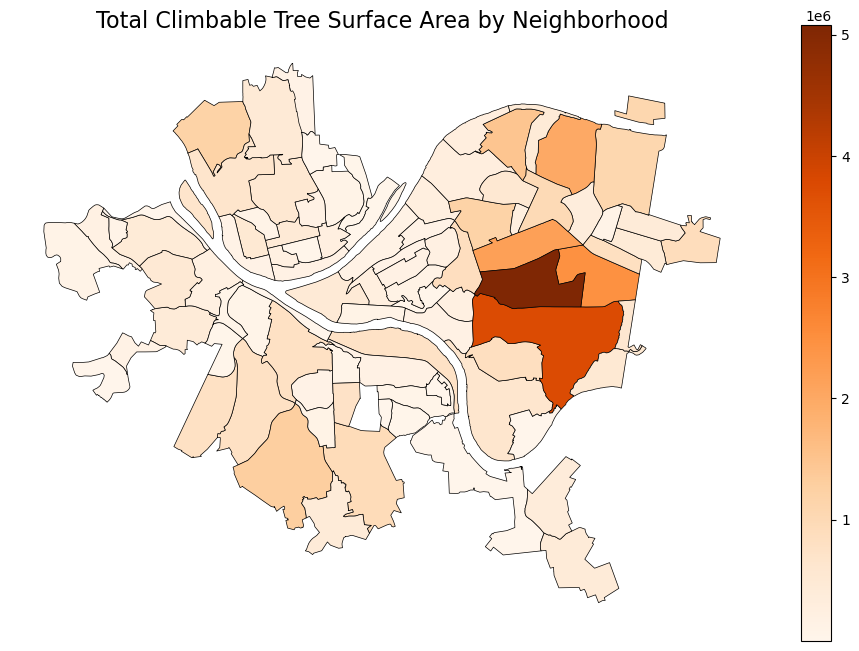

In [10]:
# Merge climbable surface area into shapefile
neighborhoods_with_surface = neighborhoods.merge(neighborhood_surface_area, left_on='hood',
                                                 right_on='neighborhood',how='left')

# Make sure the neighborhoods match
neighborhoods_with_surface['surface_area'] = neighborhoods_with_surface['surface_area'].fillna(0)

# Plot the map
fig, ax = plt.subplots(figsize=(12, 8))

neighborhoods_with_surface.plot(
    column='surface_area',
    cmap='Oranges',
    linewidth=0.5,
    edgecolor='black',
    legend=True,
    ax=ax
)

ax.set_title("Total Climbable Tree Surface Area by Neighborhood", fontsize=16)
ax.axis('off')

plt.show()

In [11]:
# Show data in a table
print("🌳 Top 5 Neighborhoods by Climbable Tree Surface Area")
neighborhood_surface_area.head(5)

🌳 Top 5 Neighborhoods by Climbable Tree Surface Area


,neighborhood,surface_area
75,Squirrel Hill North,5.079424e+06
76,Squirrel Hill South,3.737012e+06
62,Point Breeze,2.471529e+06
67,Shadyside,2.166895e+06
39,Highland Park,1.995873e+06


## According to our refined data...

**Squirrel Hill North**

Has the most climbable area!

Well, let's not forget about the weird trees yet...

# Weird Trees 🥸

For these, we can simply count how many of these are in each neighborhood

In [12]:
# Count the weird trees by neighborhood
weird_tree_counts = (weird_trees.groupby('neighborhood').size()
                     .reset_index(name='weird_tree_count')
                     .sort_values(by='weird_tree_count', ascending=False))

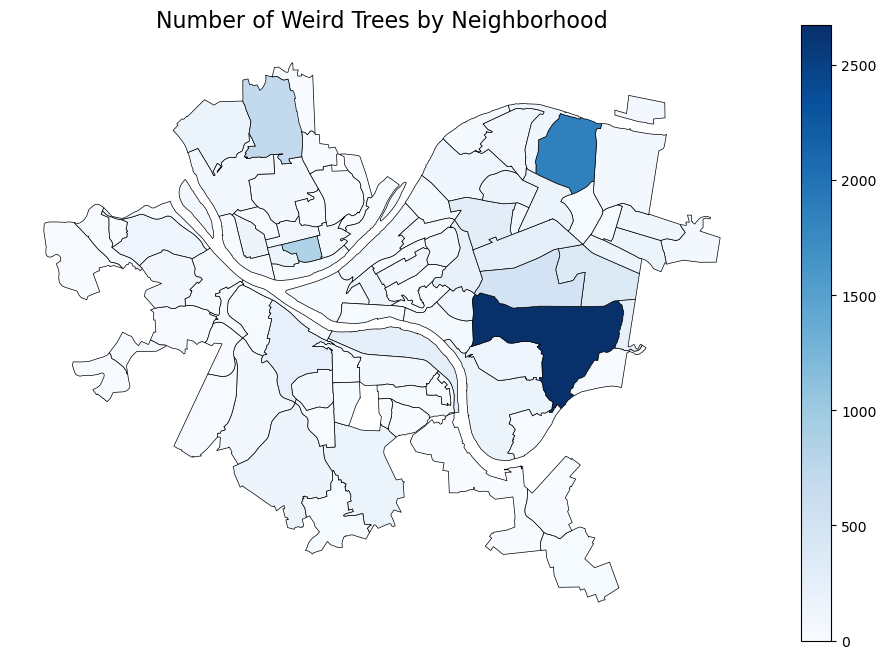

In [13]:
# Merge with the shapefile
neighborhoods_with_weird_count = neighborhoods.merge(weird_tree_counts,left_on='hood',
    right_on='neighborhood',
    how='left')

# Fill missing counts with 0
neighborhoods_with_weird_count['weird_tree_count'] = neighborhoods_with_weird_count['weird_tree_count'].fillna(0)

# Plot the map
fig, ax = plt.subplots(figsize=(12, 8))

neighborhoods_with_weird_count.plot(
    column='weird_tree_count',
    cmap='Blues',
    linewidth=0.5,
    edgecolor='black',
    legend=True,
    ax=ax
)

ax.set_title("Number of Weird Trees by Neighborhood", fontsize=16)
ax.axis('off')

plt.show()

In [14]:
# Show the table
print("🥸 Top 5 Neighborhoods by Number of Wierd Trees")
weird_tree_counts.head(5)

🥸 Top 5 Neighborhoods by Number of Wierd Trees


,neighborhood,weird_tree_count
72,Squirrel Hill South,2678
37,Highland Park,1861
0,Allegheny Center,848
56,Perry North,692
71,Squirrel Hill North,497


## What a coincidence...

Squirrel Hill South

Has the most **total trees**

*and*

the most **"weird" trees.**

So, if we were going by *best out of 3* categories...

### Squirrel Hill South would be number 1!

But, we must be a little more nuanced...

![thinking](https://media1.giphy.com/media/v1.Y2lkPTc5MGI3NjExM2d0aHQxbGdpdWp0czVnbmtscTBzczczOHhzb3JheW45ZzdwdjhjZiZlcD12MV9pbnRlcm5hbF9naWZfYnlfaWQmY3Q9Zw/WRQBXSCnEFJIuxktnw/giphy.gif)

# The Final Verdict ⚖

We have explored total tree counts, total tree surface area, and even the realm of weird trees...

Squirell Hill South has the most total trees, along with the most "weird" trees with missing data.

#### However...

Our definitive measure of feline friendliness is total climbable surface area - *and the winner is:*

##### 🐱🎉 **Squirell Hill North** 🎉🐱

This neighborhood offers the most total tree area for adventurous stray cats to climb, perch, and nap!

![cool cat](https://media1.giphy.com/media/v1.Y2lkPTc5MGI3NjExcnN2aDl1cjIxdzFtd2N3amQyNWtkM3o2eDF0aG81Znhyb2c5dGxmaCZlcD12MV9pbnRlcm5hbF9naWZfYnlfaWQmY3Q9Zw/GeimqsH0TLDt4tScGw/giphy.gif)


# Note: the section below is for the final notebook!

In [15]:
# Get top 10 surface area neighborhoods
top10_rank = neighborhood_surface_area.head(10).copy()

#Create a column for rank
top10_rank['rank'] = range(1, 11)

# Define a method for calculating score
def get_score(rank):
    return 110 - rank * 10

# Assign each neighborhood a score
top10_rank['score'] = top10_rank['rank'].apply(get_score)

# Show the table
top10_rank.head(10)

,neighborhood,surface_area,rank,score
75,Squirrel Hill North,5.079424e+06,1,100
76,Squirrel Hill South,3.737012e+06,2,90
62,Point Breeze,2.471529e+06,3,80
67,Shadyside,2.166895e+06,4,70
39,Highland Park,1.995873e+06,5,60
78,Stanton Heights,1.484717e+06,6,50
13,Brookline,1.307726e+06,7,40
9,Bloomfield,1.199787e+06,8,30
12,Brighton Heights,1.196796e+06,9,20
46,Lincoln-Lemington-Belmar,1.089793e+06,10,10
